In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error

from keras.models import Sequential
from keras.layers import Dense, LSTM

2024-04-28 01:03:09.681230: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-04-28 01:03:09.725026: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-04-28 01:03:09.725068: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-04-28 01:03:09.725096: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-04-28 01:03:09.732644: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-04-28 01:03:09.733137: I tensorflow/core/platform/cpu_feature_guard.cc:182] This Tens

In [2]:
df = pd.read_csv('goog.csv')

In [3]:
df.head()

,Date,Open,High,Low,Close,Volume
0,12/19/2016,790.219971,797.659973,786.270020,794.200012,1225900
1,12/20/2016,796.760010,798.650024,793.270020,796.419983,925100
2,12/21/2016,795.840027,796.676025,787.099976,794.559998,1208700
3,12/22/2016,792.359985,793.320007,788.580017,791.260010,969100
4,12/23/2016,790.900024,792.739990,787.280029,789.909973,623400


In [4]:
df.describe()

,Open,High,Low,Close,Volume
count,61.000000,61.000000,61.000000,61.000000,6.100000e+01
mean,814.005573,817.755576,809.734066,814.561804,1.361269e+06
std,18.784303,18.556004,19.384799,19.265955,4.987376e+05
min,778.809998,782.780029,770.409973,771.820007,6.234000e+05
25%,799.679993,802.700012,793.270020,801.340027,1.057900e+06
50%,809.510010,815.250000,804.539978,809.559998,1.247700e+06
75%,828.659973,833.250000,825.059998,830.630005,1.494500e+06
max,851.609985,853.400024,847.109985,852.119995,3.228900e+06


In [5]:
df.dtypes

Date       object
Open      float64
High      float64
Low       float64
Close     float64
Volume      int64
dtype: object

In [6]:
df.shape

(61, 6)

In [7]:
df['Close'].values

array([794.200012, 796.419983, 794.559998, 791.26001 , 789.909973,
       791.549988, 785.049988, 782.789978, 771.820007, 786.140015,
       786.900024, 794.02002 , 806.150024, 806.650024, 804.789978,
       807.909973, 806.359985, 807.880005, 804.609985, 806.070007,
       802.174988, 805.02002 , 819.309998, 823.869995, 835.669983,
       832.150024, 823.309998, 802.320007, 796.789978, 795.695007,
       798.530029, 801.48999 , 801.340027, 806.969971, 808.380005,
       809.559998, 813.669983, 819.23999 , 820.450012, 818.97998 ,
       824.159973, 828.070007, 831.659973, 830.76001 , 831.330017,
       828.640015, 829.280029, 823.210022, 835.23999 , 830.630005,
       829.080017, 827.780029, 831.909973, 835.369995, 838.679993,
       843.25    , 845.539978, 845.619995, 847.200012, 848.780029,
       852.119995])

In [8]:
df['Close'].values.reshape(-1,1)

array([[794.200012],
       [796.419983],
       [794.559998],
       [791.26001 ],
       [789.909973],
       [791.549988],
       [785.049988],
       [782.789978],
       [771.820007],
       [786.140015],
       [786.900024],
       [794.02002 ],
       [806.150024],
       [806.650024],
       [804.789978],
       [807.909973],
       [806.359985],
       [807.880005],
       [804.609985],
       [806.070007],
       [802.174988],
       [805.02002 ],
       [819.309998],
       [823.869995],
       [835.669983],
       [832.150024],
       [823.309998],
       [802.320007],
       [796.789978],
       [795.695007],
       [798.530029],
       [801.48999 ],
       [801.340027],
       [806.969971],
       [808.380005],
       [809.559998],
       [813.669983],
       [819.23999 ],
       [820.450012],
       [818.97998 ],
       [824.159973],
       [828.070007],
       [831.659973],
       [830.76001 ],
       [831.330017],
       [828.640015],
       [829.280029],
       [823.2

In [9]:
scaler = MinMaxScaler()

In [10]:
# Converts 1D array to 2D array of size n*1
scaled_data = scaler.fit_transform(df['Close'].values.reshape(-1,1))

In [11]:
train_data = scaled_data[:int(len(scaled_data)*0.8)]
train_data

array([[0.27870496],
       [0.30635093],
       [0.28318798],
       [0.24209223],
       [0.22527981],
       [0.24570341],
       [0.16475695],
       [0.13661236],
       [0.        ],
       [0.17833138],
       [0.18779601],
       [0.27646347],
       [0.42752207],
       [0.43374872],
       [0.41058501],
       [0.44943925],
       [0.43013678],
       [0.44906604],
       [0.4083435 ],
       [0.42652559],
       [0.37801975],
       [0.41344979],
       [0.5914072 ],
       [0.64819422],
       [0.79514303],
       [0.75130792],
       [0.64122041],
       [0.37982571],
       [0.31095859],
       [0.29732258],
       [0.33262797],
       [0.36948926],
       [0.36762172],
       [0.43773312],
       [0.4552927 ],
       [0.4699875 ],
       [0.52117039],
       [0.59053537],
       [0.60560414],
       [0.58729739],
       [0.6518054 ],
       [0.70049824],
       [0.74520517],
       [0.73399766],
       [0.74109613],
       [0.70759672],
       [0.71556701],
       [0.639

In [12]:
test_data = scaled_data[int(len(scaled_data)*0.8):]
test_data

array([[0.7897882 ],
       [0.73237866],
       [0.7130762 ],
       [0.69688705],
       [0.74831849],
       [0.79140719],
       [0.8326276 ],
       [0.88953927],
       [0.91805706],
       [0.91905354],
       [0.93872997],
       [0.95840639],
       [1.        ]])

In [13]:
def create_seq(data, time_steps = 6):
    X,Y = [],[]
    for i in range(len(data) - time_steps):
        X.append(data[i : i + time_steps, 0])
        Y.append(data[i + time_steps, 0])
    return np.array(X), np.array(Y)

In [14]:
X_train, y_train = create_seq(train_data)
X_train.shape, y_train.shape

((42, 6), (42,))

In [15]:
X_test, y_test = create_seq(test_data)
X_test.shape, y_test.shape

((7, 6), (7,))

In [16]:
y_train

array([0.16475695, 0.13661236, 0.        , 0.17833138, 0.18779601,
       0.27646347, 0.42752207, 0.43374872, 0.41058501, 0.44943925,
       0.43013678, 0.44906604, 0.4083435 , 0.42652559, 0.37801975,
       0.41344979, 0.5914072 , 0.64819422, 0.79514303, 0.75130792,
       0.64122041, 0.37982571, 0.31095859, 0.29732258, 0.33262797,
       0.36948926, 0.36762172, 0.43773312, 0.4552927 , 0.4699875 ,
       0.52117039, 0.59053537, 0.60560414, 0.58729739, 0.6518054 ,
       0.70049824, 0.74520517, 0.73399766, 0.74109613, 0.70759672,
       0.71556701, 0.63997538])

In [17]:
model = Sequential()

In [18]:
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1],1)))
model.add(LSTM(units=50))
model.add(Dense(units=1))
model.compile(optimizer='adam', loss='mean_squared_error')
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 6, 50)             10400     
                                                                 
 lstm_1 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 30651 (119.73 KB)
Trainable params: 30651 (119.73 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [19]:
history = model.fit(X_train, y_train, batch_size=4, epochs=100)

Epoch 1/100
11/11 [==============================] - 4s 7ms/step - loss: 0.1923
Epoch 2/100
11/11 [==============================] - 0s 7ms/step - loss: 0.0354
Epoch 3/100
11/11 [==============================] - 0s 9ms/step - loss: 0.0333
Epoch 4/100
11/11 [==============================] - 0s 6ms/step - loss: 0.0241
Epoch 5/100
11/11 [==============================] - 0s 7ms/step - loss: 0.0246
Epoch 6/100
11/11 [==============================] - 0s 8ms/step - loss: 0.0235
Epoch 7/100
11/11 [==============================] - 0s 7ms/step - loss: 0.0236
Epoch 8/100
11/11 [==============================] - 0s 7ms/step - loss: 0.0238
Epoch 9/100
11/11 [==============================] - 0s 7ms/step - loss: 0.0234
Epoch 10/100
11/11 [==============================] - 0s 7ms/step - loss: 0.0226
Epoch 11/100
11/11 [==============================] - 0s 11ms/step - loss: 0.0235
Epoch 12/100
11/11 [==============================] - 0s 7ms/step - loss: 0.0231
Epoch 13/100
11/11 [================

In [20]:
y_pred = model.predict(X_test)
y_pred

1/1 [==============================] - 1s 709ms/step


array([[0.86927146],
       [0.8783914 ],
       [0.93079394],
       [0.93757427],
       [0.91639036],
       [0.9673114 ],
       [1.0100676 ]], dtype=float32)

In [21]:
y_test

array([0.8326276 , 0.88953927, 0.91805706, 0.91905354, 0.93872997,
       0.95840639, 1.        ])

In [22]:
d_scaled = pd.DataFrame({'y_test_scaled': y_test[:], 'y_pred_scaled': y_pred[:,0]})
d_scaled

,y_test_scaled,y_pred_scaled
0,0.832628,0.869271
1,0.889539,0.878391
2,0.918057,0.930794
3,0.919054,0.937574
4,0.938730,0.916390
5,0.958406,0.967311
6,1.000000,1.010068


In [23]:
y_pred = scaler.inverse_transform(y_pred)
y_test = scaler.inverse_transform(y_test.reshape(-1,1))

In [24]:
d = pd.DataFrame({'y_test': y_test[:,0], 'y_pred': y_pred[:,0]})
d

,y_test,y_pred
0,838.679993,841.622498
1,843.250000,842.354797
2,845.539978,846.562744
3,845.619995,847.107239
4,847.200012,845.406128
5,848.780029,849.495056
6,852.119995,852.928467


In [25]:
mae = mean_absolute_error(y_test,y_pred)
mse = mean_squared_error(y_test,y_pred)

print(f'Mean Absolute Error: {(mae):.2f}')
print(f'Mean Squared Error: {(mse): .2f}')

Mean Absolute Error: 1.38
Mean Squared Error:  2.44


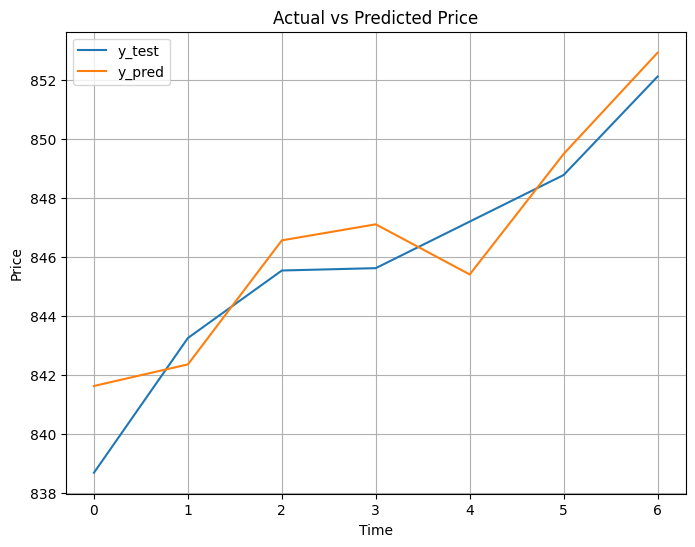

In [26]:
plt.figure(figsize=(8,6))

plt.plot(d['y_test'], label='y_test')
plt.plot(d['y_pred'], label='y_pred')

plt.title('Actual vs Predicted Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()